# Observational Omega*



In [36]:
#Constants
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
e = 2.7182818284



In [37]:
#Functions for GSMF and number of galaxies against mass

def schechter(logM, PHI, logM0, alpha):
    exp = e**(-pow(10,logM-logM0))
    tenth = pow(10, logM-logM0)
    schechter=np.log(10)*PHI*exp*tenth**(alpha+1)
    return schechter

def num_gal(M, PHI, M0, alpha):
    exp = e**-(M/M0)
    schechter=PHI*exp*(M/M0)**(alpha+1)
    return schechter


GSMF from physical observation

[4.69215387e-02 4.68873949e-02 4.68532728e-02 ... 1.61013898e-15
 1.40354736e-15 1.22269125e-15]
hello


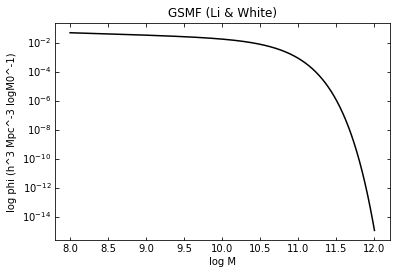

In [50]:

schechter_range = np.linspace(8,12,2000)

log_schechter = [x for x in np.log(schechter(schechter_range, PHI=0.0083, logM0=10.525, alpha=-1.155 ))]
schechter_val = schechter(schechter_range, PHI=0.0083, logM0=10.525, alpha=-1.155)
print(schechter_val)

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
#ax.set_xlim([8,12])
#ax.set_ylim([-9,0])
plt.plot(schechter_range, schechter_val, 'k')
plt.title("GSMF (Li & White)")
plt.xlabel("log M")
plt.ylabel("log phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale("log")
print("hello")
plt.show()


#i have not figure this out


In [3]:
#Li, White
#z = 0.07

schechter_range = np.linspace(8,12,1000)
phi = schechter(schechter_range, PHI=0.0083, logM0=10.525, alpha=-1.155) #phi
mass = np.linspace(10**8, 10**12, 10000) #mass
print(type(phi))

rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]/10.525
    #data = 0.0083*schechter_range[i]*mass[i]
    rho_star += data

print(rho_star)


<class 'numpy.ndarray'>
43566455531.70875


In [44]:
#Li, White
#z = 0.07

rho_crit = 22.7754*10**10
e = 2.7182818284
M_star = 10**10.525
print(10**0.0083)

def num_gal(M, PHI=0.0083, M0=M_star, alpha=-1.155):
    exp = e**-(M/M0)
    schechter=PHI*exp*(M/M0)**(alpha+1)
    return schechter

mass = np.linspace(10**8, 10**12, 10000) #mass
phi = num_gal(mass) #phi

rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]/10.525
    rho_star += data

#rho_sta = 3.14*10**8
print(rho_star, "rho* ")
omega_star = rho_star/rho_crit
print(omega_star, "omega* at z = 0.07")

1.019295249134929
8353603203.333221 rho* 
0.036678184371441214 omega* at z = 0.07


In [8]:
#Baldry
phi_val = [31.1, 18.1, 17.9, 43.1, 31.6, 34.8, 27.3, 28.3, 23.5, 19.2, 18.0, 14.3, 10.2, 9.59, 7.42, 6.21, 5.71, 5.51, 5.48, 5.12, 3.55, 2.41, 1.27, 0.338, 0.042, 0.021, 0.042]
phi_err = [21.6, 6.6, 5.7, 8.7, 9.0, 8.4, 4.2, 2.8, 3.0, 1.2, 2.6, 1.7, 0.6, 0.55, 0.41, 0.37, 0.35, 0.34, 0.34, 0.33, 0.27, 0.23, 0.16, 0.085, 0.030, 0.021, 0.030]
bin = [0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
logM = [6.25, 6.75, 7.10, 7.30, 7.50, 7.70, 7.90, 8.10, 8.30, 8.50, 8.70, 8.90, 9.10, 9.30, 9.50, 9.70, 9.90, 10.10, 10.30, 10.50, 10.70, 10.90, 11.10, 11.30, 11.50, 11.70, 11.90]
M = []
phi = []
rho_star = 0
rho_crit = 22.7754*10**10

for i in range(len(logM)):
    m = 10**logM[i]
    M.append(m)
    p = phi_val[i]*10**-3
    phi.append(p)

for i in range(len(phi)):
    rho = phi[i]*M[i]*bin[i]
    rho_star += rho

omega_star = rho_star/rho_crit
print(rho_star, "rho*")
print(omega_star, "omega* at z=0.2 ")


233495004.3776055 rho*
0.0010252070408317989 omega* at z=0.2 


In [51]:
#Panter 2007
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
#z = 0.1

rho_crit = 22.7754*10**10
e = 2.7182818284
M_star = 1.005*10**11
log_M = np.log10(M_star)

def num_gal(M, PHI=0.0022, M0=M_star, alpha=-1.222):
    exp = e**-(M/M0)
    schechter=PHI*exp*(M/M0)**(alpha+1)
    return schechter

mass = np.linspace(10**7, 10**12, 10000) #mass
phi = num_gal(mass) #phi


print(mass, "mass")
print(phi, "phi")
rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]*log_M
    rho_star += data

    
print(rho_star, "rho* ")
omega_star = rho_star/rho_crit
print(omega_star, "omega* at z = 0.1")

#Plotting the GSMF

schechter_range = np.linspace(8.5,12,2000)
gsmf = schechter(schechter_range, PHI=0.0022, logM0=log_M, alpha=-1.222 )
for i in np.arange(len(schechter_range)):
    data = gsmf[i]/schechter_range[i]


fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
ax.set_xlim([8,12])
ax.plot(schechter_range, gsmf, 'k')
plt.title("GSMF (Panter)")
plt.xlabel("log M")
plt.ylabel("phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale("log")
plt.show()

#checked

[1.00000000e+07 1.10009001e+08 2.10018002e+08 ... 9.99799982e+11
 9.99899991e+11 1.00000000e+12] mass
[1.70161119e-02 9.98231098e-03 8.63883223e-03 ... 6.31610077e-08
 6.30967854e-08 6.30326286e-08] phi


TypeError: 'numpy.ndarray' object is not callable

In [55]:
#Panter 2007
#SDSS- DR3


z = [0.0130, 0.0272, 0.0575, 0.125, 0.286, 0.705, 1.87]
#stellar mass density
rho = [8.459, 8.459, 8.458, 8.454, 8.427, 8.362, 8.222]
rho_star = []
omega_star = []
rho_crit = 22.7754*10**10

for i in np.arange(len(rho)):
    data = 10**rho[i]
    rho_star.append(data)
    
for i in np.arange(len(z)):
    omega = rho_star[i]/rho_crit
    omega_star.append(omega)

print(rho_star, "rho_star")
print(omega_star, "omega_star")

#CHECK VOLUME? yes universe

[287739841.47356665, 287739841.47356665, 287078058.2024692, 284446110.744792, 267300640.8663309, 230144181.7408509, 166724721.2551061] rho_star
[0.0012633799690612093, 0.0012633799690612093, 0.0012604742757645058, 0.001248918178143049, 0.0011736375249889394, 0.001010494576344876, 0.0007320386085649696] omega_star


5
[301995172.0402019, 218776162.3949552, 208929613.0854041, 213796208.95022324, 147910838.8168207]


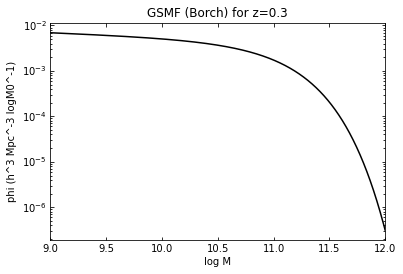

8.48
8.34
8.32
8.33
8.17


In [49]:
#Borch 2006
#For all galaxies
#Combo-17 survey
z = [0.0, 0.3, 0.5, 0.7, 0.9]
log_rho = [8.48, 8.34, 8.32, 8.33, 8.17]
log_rho_err = [0.10, 0.15, 0.11, 0.10, 0.18]
rho_star = []
omega_star = []
rho_crit = 22.7754*10**10

print(len(log_rho))
for i in np.arange(len(log_rho)):
    rho = 10**log_rho[i]
    rho_star.append(rho)
    omega = rho/rho_crit
    omega_star.append(omega)

print(rho_star)

#for z =0.3
range = np.linspace(9,12,2000)
gsmf = schechter(range, PHI=0.0019, logM0=11.03,alpha=-1.1)

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
ax.set_xlim([9,12])
#ax.set_ylim([-5,-1])
ax.plot(range, gsmf, 'k')
plt.title("GSMF (Borch) for z=0.3")
plt.xlabel("log M")
plt.ylabel("phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale("log")
plt.show()


#checked

for i in np.arange(len(rho_star)):
    data = np.log10(rho_star[i])
    print(data)

In [6]:
import math
import numpy as np

def double_num_gal(M, alpha1=-0.74, alpha2=-1.75, M0=10.79, phi1=-2.44, phi2=-3.69):
    exp = e**-(M/M0)
    schechter1 = phi1*exp*(M/M0)**(alpha1+1)
    schechter2 = phi2*exp*(M/M0)**(alpha2+1)
    num_gal = schechter1 + schechter2
    return num_gal

mass = np.linspace(8, 13, 1000)

print(np.sum(double_num_gal(mass)))
total_mass = []
for i in range(len(double_num_gal(mass))):
    total_mass+=double_num_gal(mass)[i]

-2392.5282501900347


TypeError: 'numpy.ndarray' object is not callable

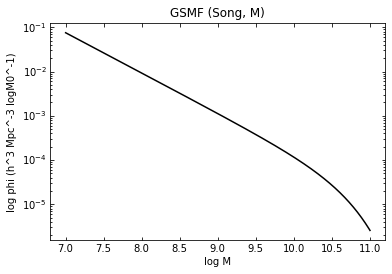

588686988.8061355 rho* 
0.0025847492856596833 omega* at z = 6


In [53]:
#Song M z=6
phi = 10**-4.87

schechter_range = np.linspace(7,11,2000)
gsmf = schechter(schechter_range, PHI=phi, logM0=10.72, alpha=-1.91)

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

ax.plot(schechter_range, gsmf, 'k')
plt.title("GSMF (Song, M)")
plt.xlabel("log M")
plt.ylabel("log phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale('log')
plt.show()

mass = np.linspace(10**7, 10**11, 2000)
phi = num_gal(mass, PHI=phi, M0=10**10.72, alpha=-1.91)

rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]
    rho_star += data

print(rho_star, "rho* ")
omega_star = rho_star/rho_crit
print(omega_star, "omega* at z = 6")




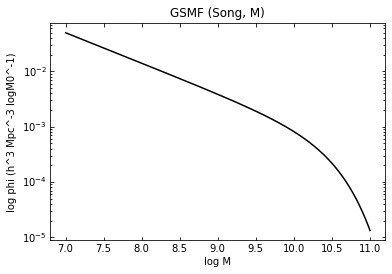

4140789393.3089294 rho* 
0.018180973301496043 omega* at z = 4


In [52]:
#Song M  z=4
phi = 10**-3.59

schechter_range = np.linspace(7,11,2000)
gsmf = schechter(schechter_range, PHI=phi, logM0=10.50, alpha=-1.55)

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

ax.plot(schechter_range, gsmf, 'k')
plt.title("GSMF (Song, M)")
plt.xlabel("log M")
plt.ylabel("log phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale('log')
plt.show()

mass = np.linspace(10**7, 10**11, 2000)
phi = num_gal(mass, PHI=phi, M0=10**10.50, alpha=-1.55)

rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]
    rho_star += data

print(rho_star, "rho* ")
omega_star = rho_star/rho_crit
print(omega_star, "omega* at z = 4")

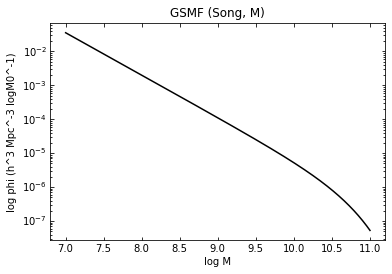

21238074.818151157 rho* 
9.325006286673848e-05 omega* at z = 8


In [51]:
#Song M  z=4
phi = 10**-6.46

schechter_range = np.linspace(7,11,2000)
gsmf = schechter(schechter_range, PHI=phi, logM0=10.72, alpha=-2.25)

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

ax.plot(schechter_range, gsmf, 'k')
plt.title("GSMF (Song, M)")
plt.xlabel("log M")
plt.ylabel("log phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale('log')
plt.show()

mass = np.linspace(10**7, 10**11, 2000)
phi = num_gal(mass, PHI=phi, M0=10**10.72, alpha=-2.25)

rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]
    rho_star += data

print(rho_star, "rho* ")
omega_star = rho_star/rho_crit
print(omega_star, "omega* at z = 8")

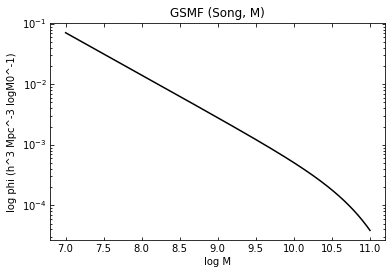

4283498037.3861065 rho* 
0.018807564465985697 omega* at z = 5


In [50]:
#Song M  z=5
phi = 10**-4.29

schechter_range = np.linspace(7,11,2000)
gsmf = schechter(schechter_range, PHI=phi, logM0=10.97, alpha=-1.70)

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

ax.plot(schechter_range, gsmf, 'k')
plt.title("GSMF (Song, M)")
plt.xlabel("log M")
plt.ylabel("log phi (h^3 Mpc^-3 logM0^-1)")
plt.yscale('log')
plt.show()

mass = np.linspace(10**7, 10**11, 2000)
phi = num_gal(mass, PHI=phi, M0=10**10.97, alpha=-1.70)

rho_star = 0
for i in range(len(phi)):
    data = phi[i]*mass[i]
    rho_star += data

print(rho_star, "rho* ")
omega_star = rho_star/rho_crit
print(omega_star, "omega* at z = 5")

Plotting all physical observation of omega*

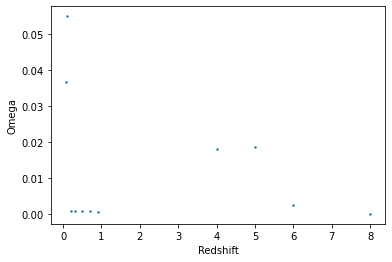

In [49]:

omega = []
z = []

myfile = open("obs_omega_star.txt")

for i in myfile:
    val = myfile.readlines() #Lists each star values in a list
    for line in val: #Splitting redshift and stellar mass
        data = line.split(" ")
        data_z = float(data[0])
        data_omega = float(data[1])
        z.append(data_z)
        omega.append(data_omega)

plt.scatter(z, omega, 2)
plt.xlabel("Redshift")
plt.ylabel("Omega")
plt.show()